<a href="https://colab.research.google.com/github/KatVil/Livecode1/blob/main/Skillbox_Data_Science_Day_Two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# День 2
*   Временные ряды
*   Matplotlib, Pandas, sklearn
*   Feature Engineering
*   Метрики оценки модели
*   Важность Фич




### Нам понадобятся данные 
Скачайте их здесь:

[Google Drive](https://drive.google.com/file/d/17Be7imiZ6dwsWPACCeuxBDMRm0s9Whaz/view?usp=sharing) / [Yandex Disk](https://disk.yandex.com/d/UOE68m01XuMLzg)



`Источник: https://www.cryptodatadownload.com/data/bitfinex/`

In [ ]:
import pandas as pd

# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

bitcoin = pd.read_csv("/content/BTCUSD_daily.csv", index_col=0) # Читаем файл, убираем лишнюю колонку
bitcoin.date = pd.to_datetime(bitcoin.date) # Преобразуем строку в структуру "DateTime", записываем в к. date

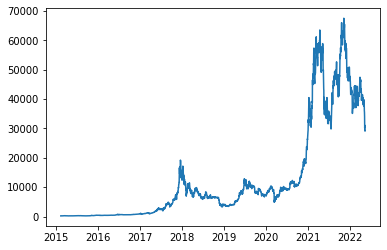

In [ ]:
import matplotlib.pyplot as plt  # plt - рисуем графики
plt.plot(bitcoin.date, bitcoin.open, label="open")

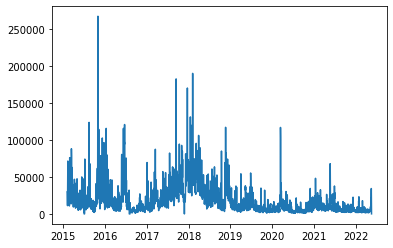

In [ ]:
plt.plot(bitcoin.date, bitcoin["Volume BTC"], label="open")

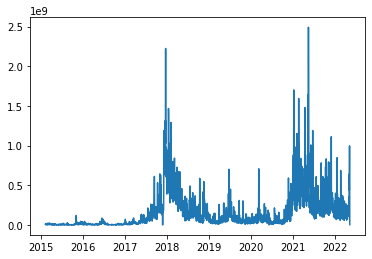

In [ ]:
plt.plot(bitcoin.date, bitcoin["Volume USD"], label="open")

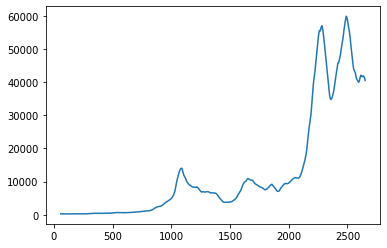

In [ ]:
# Rolling Window = Скользящее Окно
bitcoin.open.rolling(window=60).mean().plot()  # Среднее значение за 60 дней (строк)

In [ ]:
bitcoin.head()
# X = "добавить колонки на основе недавних значений", y = "цена закрытия завтрашнего дня (какой завтра будет close)", задача = регрессия

,date,symbol,open,high,low,close,Volume USD,Volume BTC
0,2015-02-09,BTC/USD,224.22,225.00,215.40,220.61,6493501.42,29625.03
1,2015-02-10,BTC/USD,220.61,223.88,214.00,220.96,6402350.57,29268.95
2,2015-02-11,BTC/USD,220.96,224.40,218.10,219.19,4268986.79,19289.28
3,2015-02-12,BTC/USD,219.19,223.20,217.87,222.60,2468883.37,11190.65
4,2015-02-13,BTC/USD,222.39,241.76,221.46,236.00,6806972.89,29079.11


In [ ]:
# Feature Engineering = придумывание новых колонок, цель = помочь модели, предоставив как можно больше данных
bitcoin["open_mean_7d"] = bitcoin.open.shift(1).rolling(window=7).mean()  #  Средняя цена открытия за последние 7 дней
bitcoin["volume_btc_max_30d"] = bitcoin["Volume BTC"].shift(1).rolling(window=30).max()  #  Макс. объем торгов за 30 дней
# ToDO: Добавить еще колонок на основе скользящего окна

In [ ]:
# Важный момент: не включать текущий день = shift(1)

In [ ]:
list(range(1,8))

[1, 2, 3, 4, 5, 6, 7]

In [ ]:
list(range(7))

[0, 1, 2, 3, 4, 5, 6]

In [ ]:
# Создадим 7 колонок со недавними значениями close
for day in range(1,8):
    print(f"Добавляем колонку close за {day} д. назад")
    bitcoin[f"close_{day}d"] = bitcoin["close"].shift(day)

Добавляем колонку close за 1 д. назад
Добавляем колонку close за 2 д. назад
Добавляем колонку close за 3 д. назад
Добавляем колонку close за 4 д. назад
Добавляем колонку close за 5 д. назад
Добавляем колонку close за 6 д. назад
Добавляем колонку close за 7 д. назад


In [ ]:
bitcoin.head(15)

,date,symbol,open,high,low,close,Volume USD,Volume BTC,open_mean_7d,volume_btc_max_30d,close_1d,close_2d,close_3d,close_4d,close_5d,close_6d,close_7d
0,2015-02-09,BTC/USD,224.22,225.00,215.40,220.61,6493501.42,29625.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-02-10,BTC/USD,220.61,223.88,214.00,220.96,6402350.57,29268.95,NaN,NaN,220.61,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-02-11,BTC/USD,220.96,224.40,218.10,219.19,4268986.79,19289.28,NaN,NaN,220.96,220.61,NaN,NaN,NaN,NaN,NaN
3,2015-02-12,BTC/USD,219.19,223.20,217.87,222.60,2468883.37,11190.65,NaN,NaN,219.19,220.96,220.61,NaN,NaN,NaN,NaN
4,2015-02-13,BTC/USD,222.39,241.76,221.46,236.00,6806972.89,29079.11,NaN,NaN,222.60,219.19,220.96,220.61,NaN,NaN,NaN
5,2015-02-14,BTC/USD,236.13,261.30,235.51,258.12,10739014.48,42984.94,NaN,NaN,236.00,222.60,219.19,220.96,220.61,NaN,NaN
6,2015-02-15,BTC/USD,257.00,266.84,228.20,234.14,17384420.70,71361.28,NaN,NaN,258.12,236.00,222.60,219.19,220.96,220.61,NaN
7,2015-02-16,BTC/USD,234.14,243.65,228.62,236.78,10798751.12,45750.85,228.642857,NaN,234.14,258.12,236.00,222.60,219.19,220.96,220.61
8,2015-02-17,BTC/USD,236.78,246.28,231.50,242.87,10228035.45,42669.08,230.060000,NaN,236.78,234.14,258.12,236.00,222.60,219.19,220.96
9,2015-02-18,BTC/USD,242.87,244.99,231.01,234.80,9164141.83,38588.38,232.370000,NaN,242.87,236.78,234.14,258.12,236.00,222.60,219.19


In [ ]:
# ДЗ: Добавить колонки на основе дня недели, месяца и года, взяв информацию из колонки date
# Например bitcoin.date.dt.weekday
# https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.weekday.html

In [ ]:
# Удаление колонок
bitcoin.drop("symbol", axis=1, inplace=True)
bitcoin.drop("date", axis=1, inplace=True)

In [ ]:
# Избавляемся от NaN
bitcoin.fillna(method="backfill", inplace=True)  # "Залить" пустые значения

In [ ]:
bitcoin["target"] = bitcoin["close"].shift(-1) # target = close следующего дня
# Но мы создали еще один Nan c конца

In [ ]:
# [:-1] "все, кроме последнего элемента"
X = bitcoin[:-1].drop("target", axis=1)
y = bitcoin[:-1].target

# Разбиваем на трен. и тест. выборку
# train - обучающая - учебник - X_train, y_train

# test - проверочная - экзамен - Даем модели X_test, 
# и просим сделать предсказани y_pred, и сравниваем с y_test
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)  # Разделяем, отдаем 33% на тест.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import max_error, mean_absolute_error, r2_score
def try_model(model):
    print(model)
    model.fit(X_train, y_train)  # Обучаем модель на ТРЕНИРОВОЧНОЙ выборке
    y_pred = model.predict(X_test)  # Проверяем модель на ТЕСТОВОЙ выборке
    print("max_error = ", max_error(y_pred, y_test))
    print("mean_absolute_error = ", mean_absolute_error(y_pred, y_test))
    print("r2_score = ", r2_score(y_pred, y_test))

In [ ]:
rfr = RandomForestRegressor(n_estimators=1000)
try_model(rfr)

RandomForestRegressor(n_estimators=1000)
max_error =  7740.193905883054
mean_absolute_error =  439.69740538597307
r2_score =  0.9964322882045664


In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression() 
try_model(lin_reg)

LinearRegression()
max_error =  6514.912943060059
mean_absolute_error =  406.20699382114475
r2_score =  0.9971899131803471


In [ ]:
# (y_pred - y_test).abs().hist()  # Распределение размера ошибки

In [ ]:
# Пробовать разные модели
# Пробовать разные настройки (?)
# Оценить модель разными метриками качества
# Пробуем разные данные (Feature Engineering)

In [ ]:
rfr.feature_importances_  # Важность колонок

array([4.76064532e-02, 1.42771475e-01, 3.99181955e-02, 2.18735665e-01,
       1.02563483e-04, 9.50452669e-05, 4.71457726e-02, 1.13459605e-04,
       4.98882187e-02, 6.67242158e-02, 7.19015930e-02, 1.78624312e-02,
       1.70590108e-01, 4.42797995e-02, 8.22650047e-02])

In [ ]:
# Выведем колонки в порядке важности
pd.DataFrame(data = [rfr.feature_importances_], columns = X.columns).T.sort_values(by=0, ascending=False)

,0
close,0.218736
close_5d,0.170590
high,0.142771
close_7d,0.082265
close_3d,0.071902
close_2d,0.066724
close_1d,0.049888
open,0.047606
open_mean_7d,0.047146
close_6d,0.044280


# ДЕНЬ 3


*   Cross-validation
*   GridSearch
*   Gradient Descent




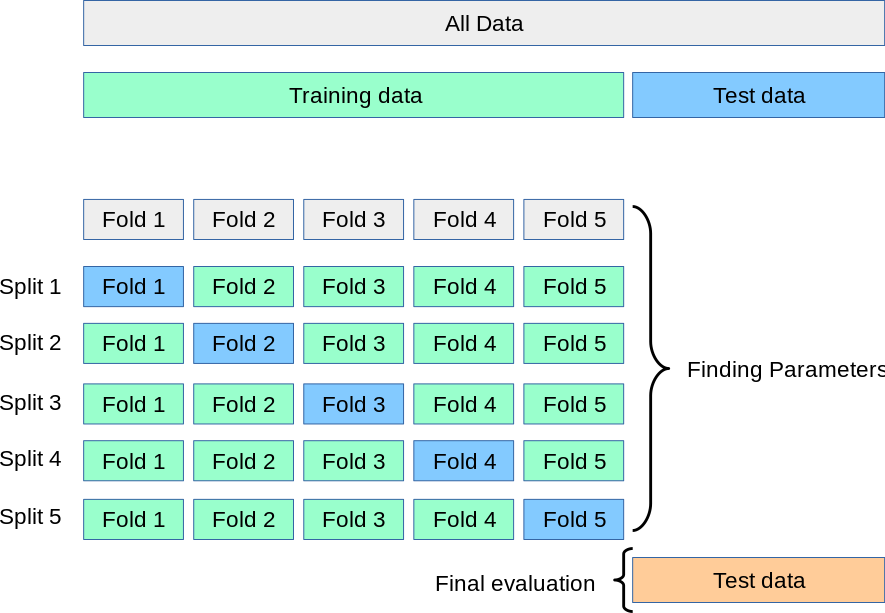

In [ ]:
from sklearn.model_selection import GridSearchCV
# GridSearch - поиск оптимальных настроек модели ( гиперпараметры )
# n_estimators = 100, max_depth = 8 / RFR
# grid = сетка параметров

param_grid = {
    "n_estimators": [50, 100, 300],  # 3
    "max_depth": range(2,5),  # 3
    "max_features": [3, 0.7, "sqrt", "log2"] # 4
}
# Сколько всего комбинаций = 36 моделей

# Ищем сочетание гиперапараметров, такое чтобы получилась минимальная max_error


test_rfr = RandomForestRegressor(random_state=42)  # seed

gs = GridSearchCV(test_rfr, param_grid, scoring = 'max_error', cv=3)
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': range(2, 5),
                         'max_features': [3, 0.7, 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 300]},
             scoring='max_error')

In [ ]:
# gs.cv_results_
gs.best_params_

{'max_depth': 4, 'max_features': 0.7, 'n_estimators': 300}

In [ ]:
gs.best_estimator_

RandomForestRegressor(max_depth=4, max_features=0.7, n_estimators=300,
                      random_state=42)

In [ ]:
gs.best_score_

-6945.485621376264

# Градиентный спуск

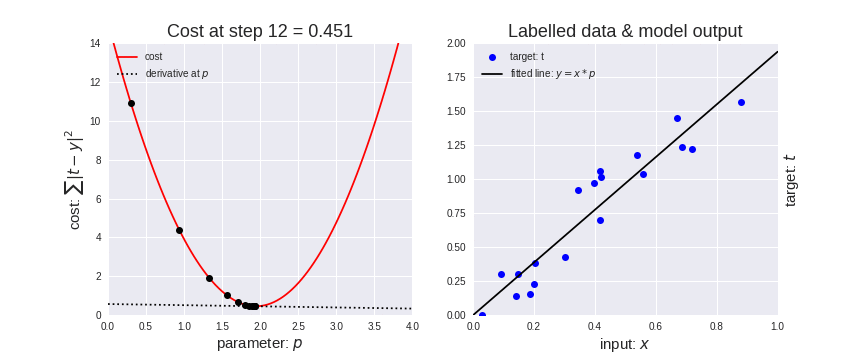